In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import missingno as msno
import scipy.stats as st
import matplotlib.patches as mpl_patches
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import describe
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.stats import pearsonr

In [2]:
df_final = pd.read_csv('data_final_rellenada.csv')
df_final

,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
0,2013-01-01,13.5,13.6,13.2,13.3,31734,89033,26174,2979637,2.433154e+13,...,625.432,14.518,8193.0,1.194,37846.0,19.536,0.627,10621175.00,5.264860e+04,13.3
1,2013-01-02,13.3,13.4,13.2,13.3,39280,114077,31809,2979637,2.280465e+13,...,650.617,14.514,8193.0,1.497,43104.0,19.597,0.835,10621575.00,5.486525e+04,13.4
2,2013-01-03,13.3,13.5,13.3,13.4,42147,108023,38197,2979637,2.372489e+13,...,542.730,19.732,8193.0,1.798,51268.0,19.621,0.925,10628700.00,4.811833e+04,13.5
3,2013-01-04,13.4,13.5,13.3,13.5,48436,141811,34990,2979637,2.260818e+13,...,632.431,11.384,8193.0,1.841,47341.0,19.540,1.000,10632425.00,5.087274e+04,13.4
4,2013-01-05,13.5,13.6,13.3,13.4,39455,118240,38008,2979637,2.259070e+13,...,697.556,13.945,8193.0,1.826,53417.0,19.543,0.885,10633200.00,5.139673e+04,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,2021-09-14,44950.2,47247.6,44718.7,47077.5,267959,599399,491643,18415156832118,1.555172e+20,...,1932378.000,717.117,91267.0,90.850,793939.0,15.218,1.394,18816150.00,4.946986e+07,48130.6
3179,2021-09-15,47070.8,48436.5,46743.9,48130.6,268815,736726,500251,18415156832118,1.330283e+20,...,702497.000,773.643,109407.0,89.096,823392.0,15.186,1.887,18816862.50,4.302687e+07,47748.0
3180,2021-09-16,48132.3,48480.6,47040.3,47748.0,271087,817607,507192,18415156832118,1.302297e+20,...,766989.000,719.701,90855.0,86.404,879832.0,15.185,1.938,18817750.00,4.144786e+07,47282.8
3181,2021-09-17,47748.2,48155.9,46788.8,47282.8,270893,720056,499224,18415156832118,1.272835e+20,...,612387.000,714.990,101046.0,81.131,823793.0,15.177,1.605,18818662.50,4.500074e+07,48306.7


In [3]:
df_final_precio_cierre_dia_sig = df_final[['Date','transactions_in_blockchain','avg_block_size','sent_by_adress',
                                            'avg_mining_difficulty','avg_hashrate','mining_profitability',
                                            'sent_coins_in_usd','avg_transaction_fees','median_transaction_fees',
                                            'avg_block_time','avg_transaction_value','median_transaction_value',
                                            'tweets','google_trends','active_addresses','top100_to_total_percentage','avg_fee_to_reward',
                                            'miner_revenue','number_of_coins_in_circulation','opening_price','highest_price','lowest_price',
                                            'closing_price','next_day_closing_price']]                  

# EDA

In [4]:
def plotear_datos(df,nombre_carac,excluir_carac='next_day_closing_price'):
    color_rand = (random.random(), random.random(), random.random())
    df.plot(x='Date',y=nombre_carac,figsize=(15,6),grid=True,color=color_rand)
    plt.title(f'Fecha VS {nombre_carac.replace("_"," ")}')
    plt.ylabel(nombre_carac)
    plt.show()
    df.plot(kind='kde',y=nombre_carac,figsize=(15,6),grid=True,color=color_rand)
    plt.title(f'KDE-{nombre_carac.replace("_"," ")}')
    plt.show()
    corr = df.corr().loc[[nombre_carac],:].sort_values(by=nombre_carac,axis=1).drop(columns=[nombre_carac,excluir_carac])
    plt.figure(figsize = (15,6))
    sns.heatmap(corr,cmap='tab10',square=True,annot=True,cbar=False,annot_kws={"fontsize":16},linewidths=1, linecolor='black',)
    plt.title(f'Correlacion con otras caracteristicas')
    plt.show()
    
def scatter_datos(df,lista_scatter,ancho_scatter):
    fig,axs = plt.subplots(1,len(lista_scatter),sharey=False,figsize=(7*len(lista_scatter),7))
    colors = plt.rcParams["axes.prop_cycle"]()
    for i,feat in enumerate(lista_scatter):
        x = sorted(list(df[ancho_scatter]))
        y = sorted(list(df[feat]))
        axs[i].scatter(x,y,marker=".",color=next(colors)["color"],label=feat)
        line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Linea normal')
        transform = axs[i].transAxes
        line.set_transform(transform)
        axs[i].add_line(line)
        axs[i].set_ylabel(feat)
        axs[i].grid()
        axs[i].set_xlabel(ancho_scatter)
        axs[i].legend()
    plt.show()

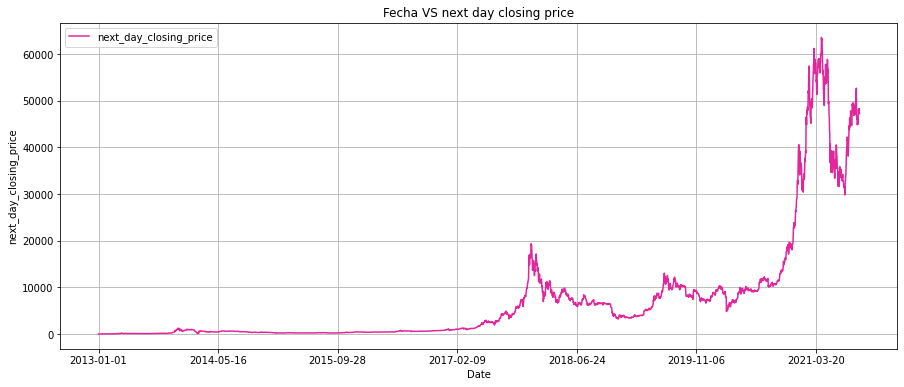

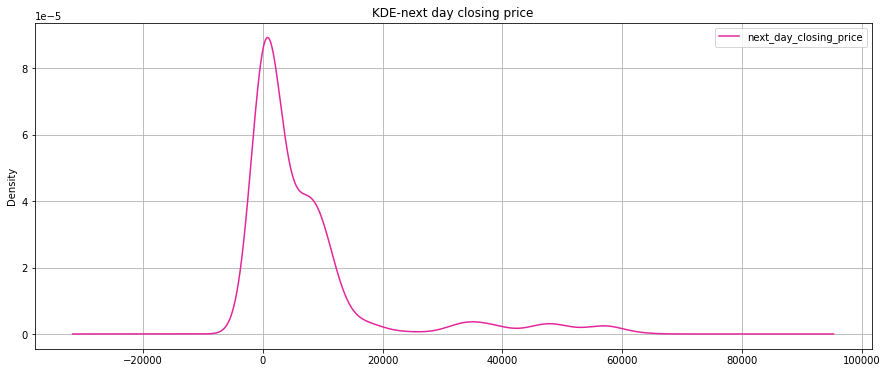

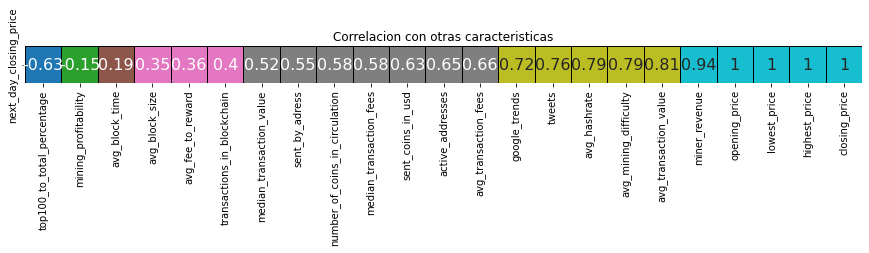

In [5]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='next_day_closing_price')

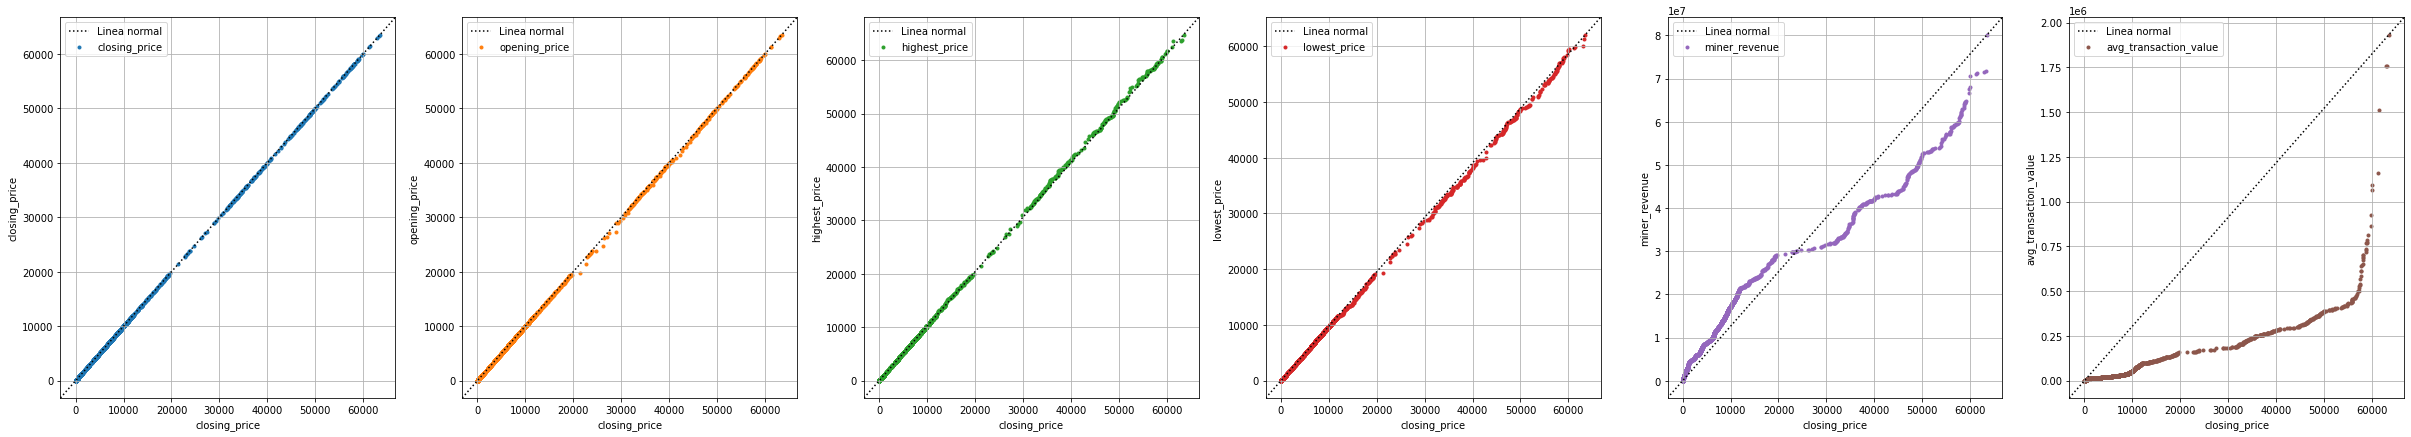

In [6]:
lista_scatter = ['closing_price','opening_price','highest_price','lowest_price','miner_revenue','avg_transaction_value']
scatter_datos(df_final_precio_cierre_dia_sig,lista_scatter,'closing_price')

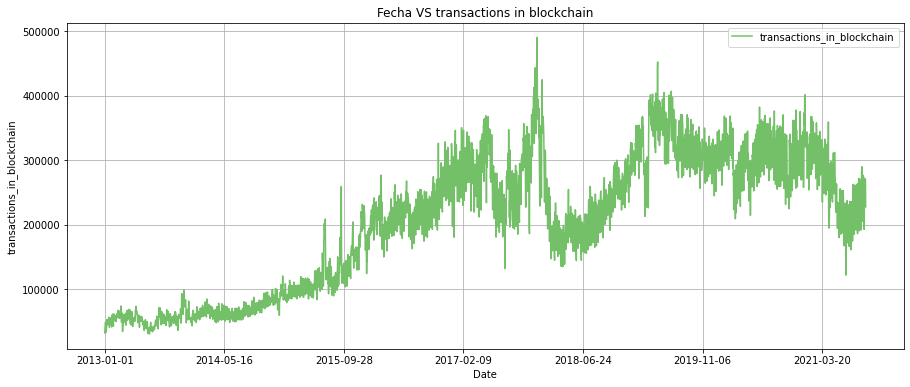

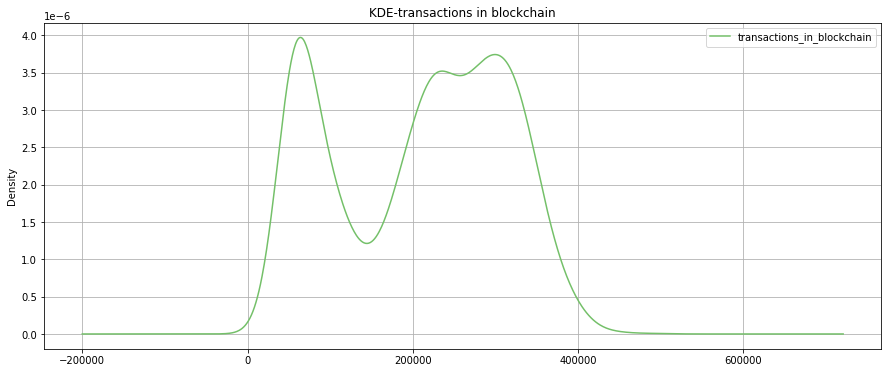

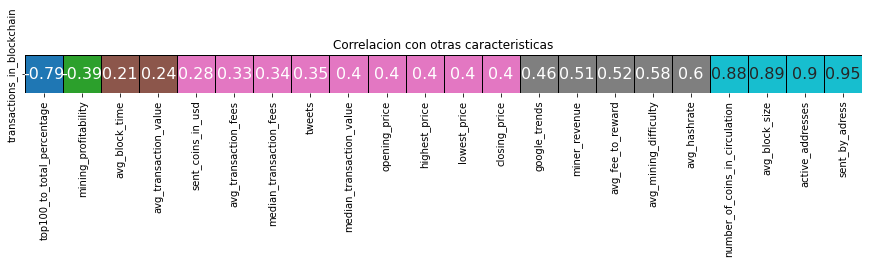

In [7]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='transactions_in_blockchain')

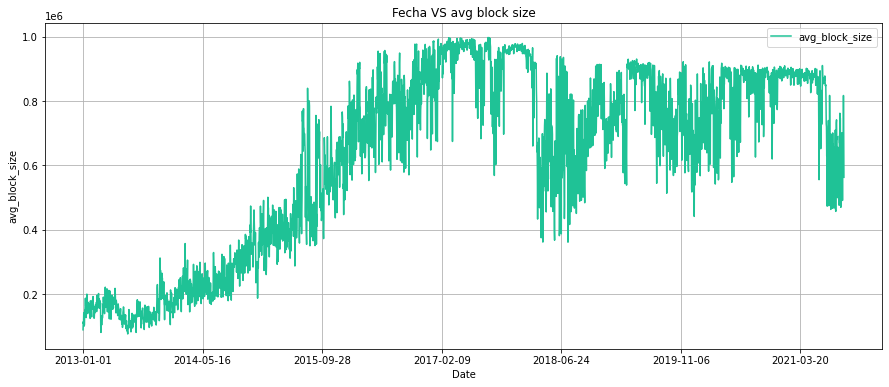

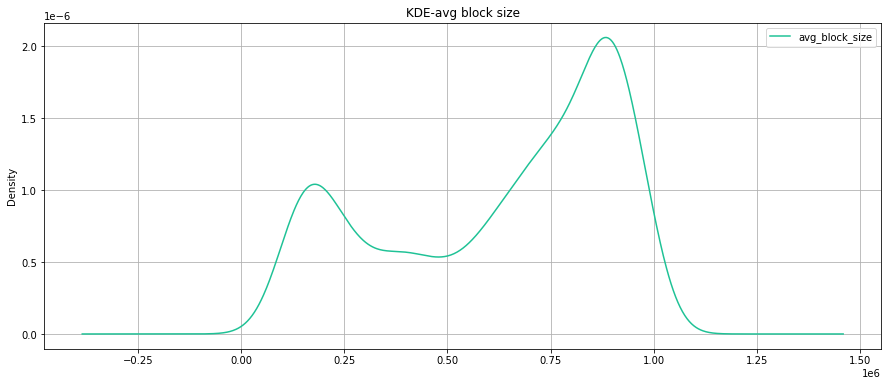

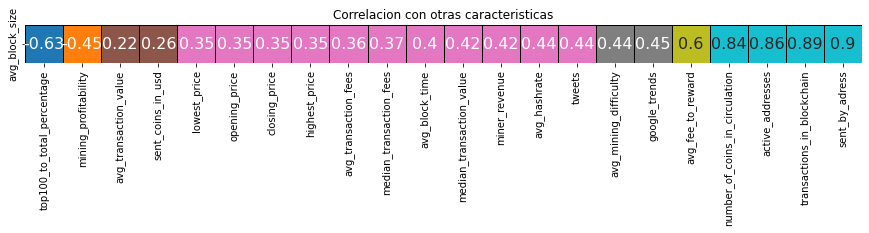

In [8]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='avg_block_size')

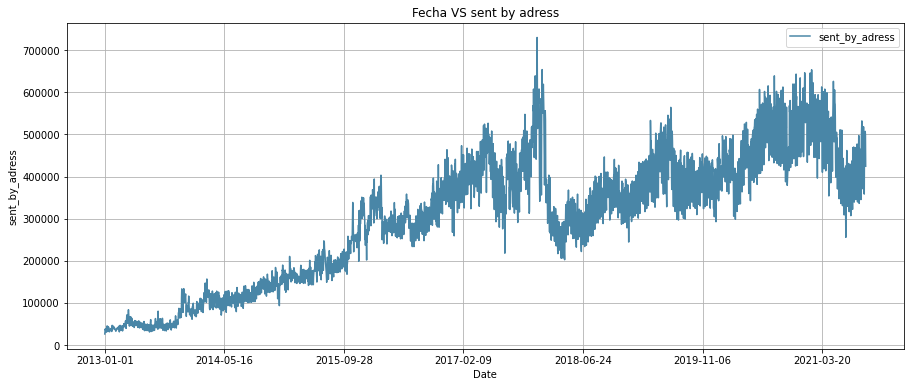

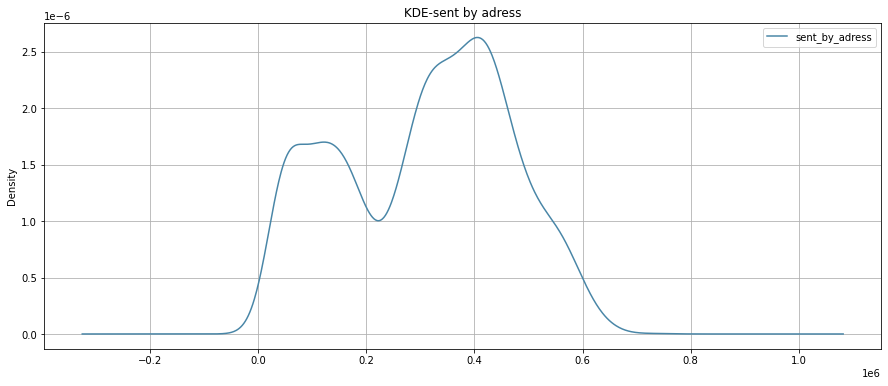

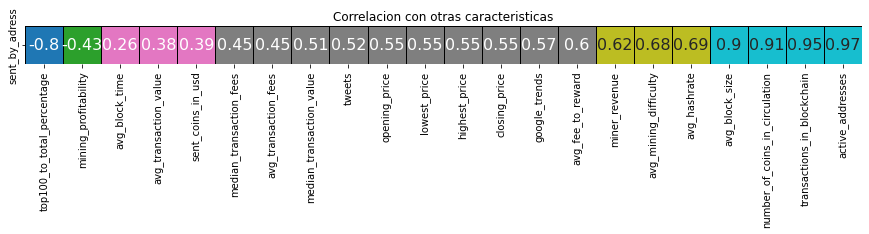

In [9]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='sent_by_adress')

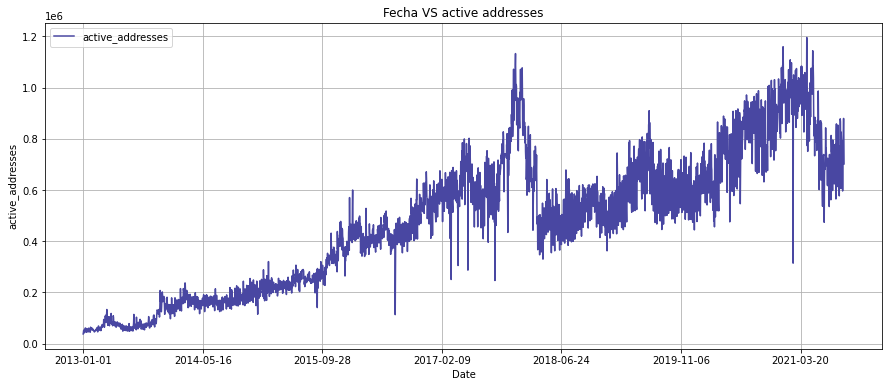

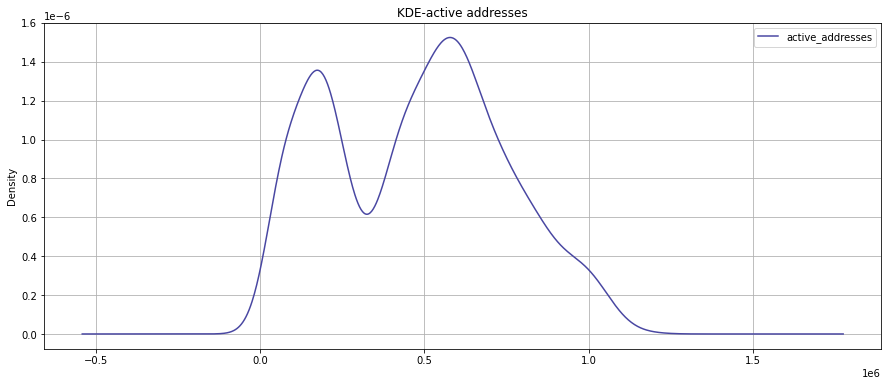

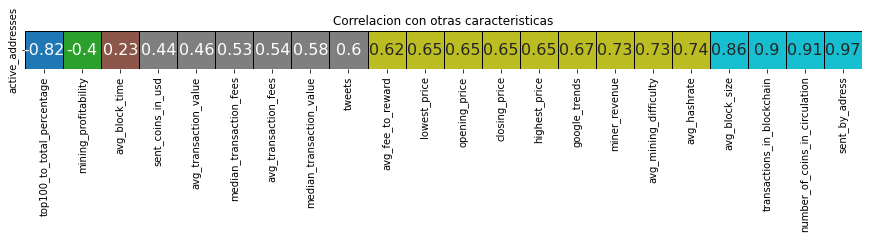

In [10]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='active_addresses')

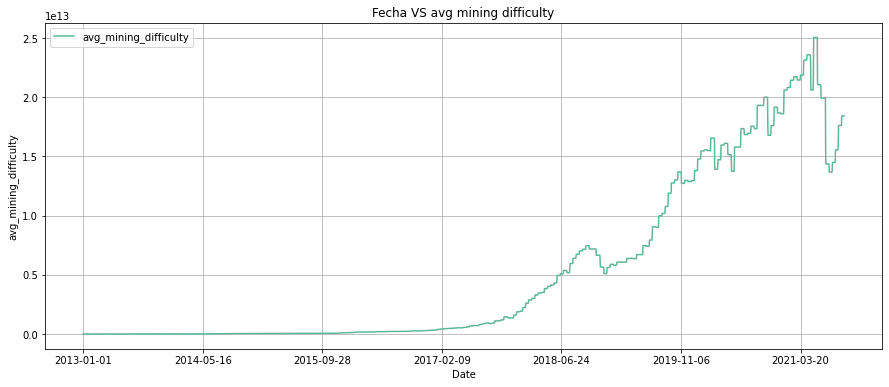

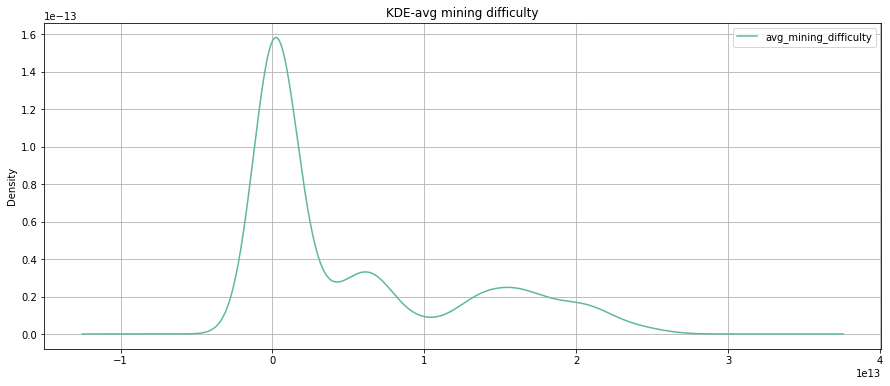

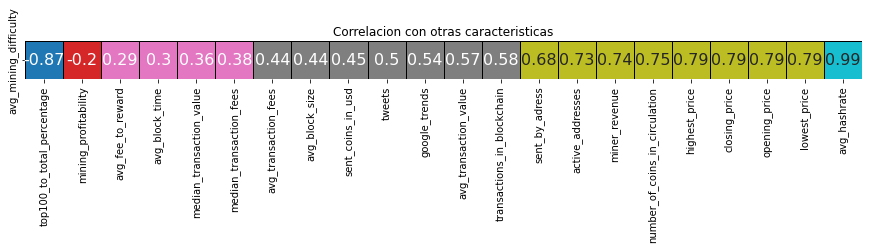

In [11]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='avg_mining_difficulty')

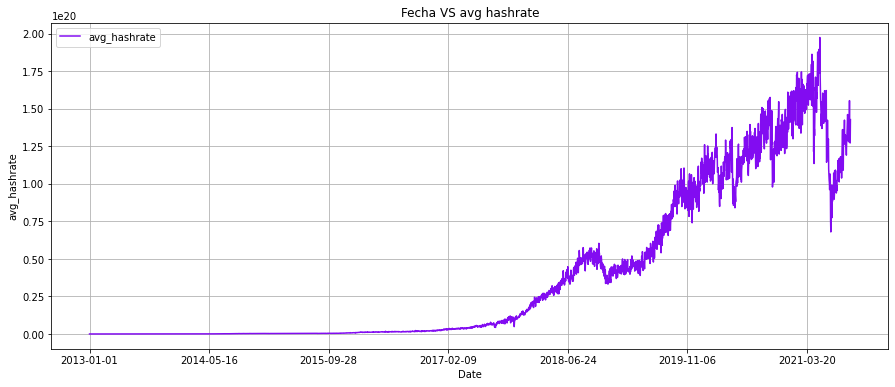

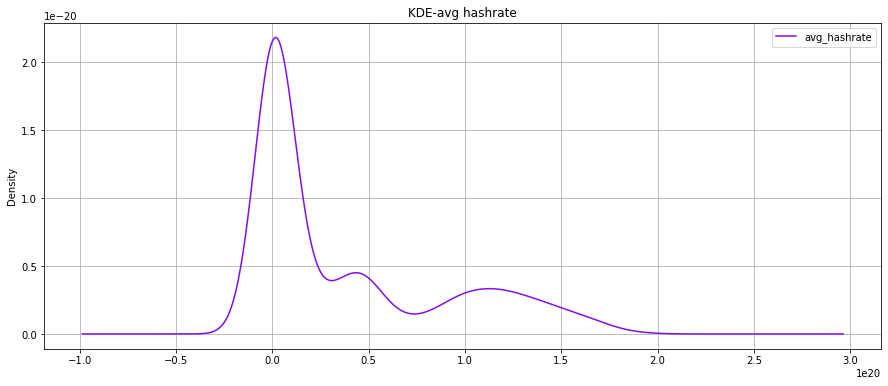

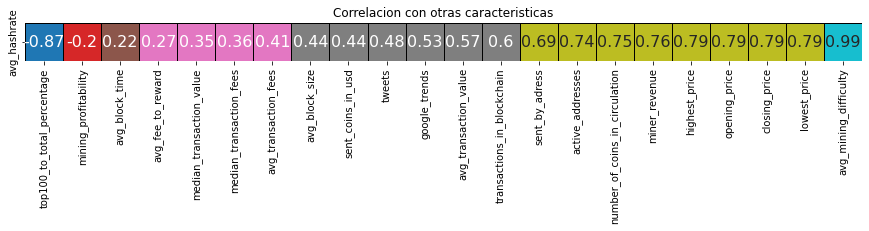

In [12]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='avg_hashrate')

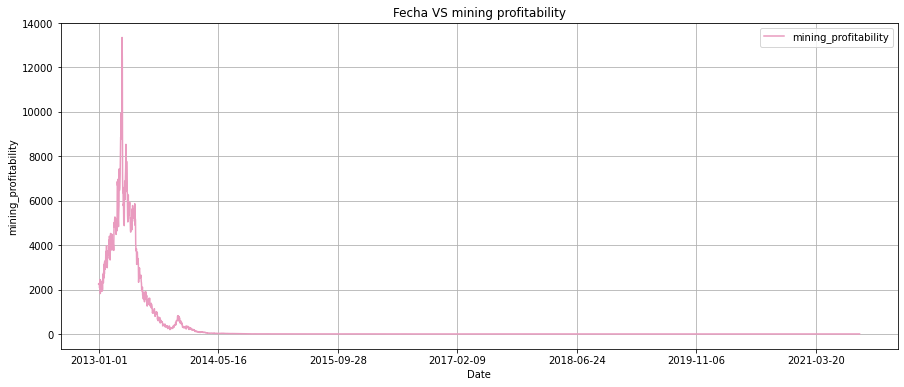

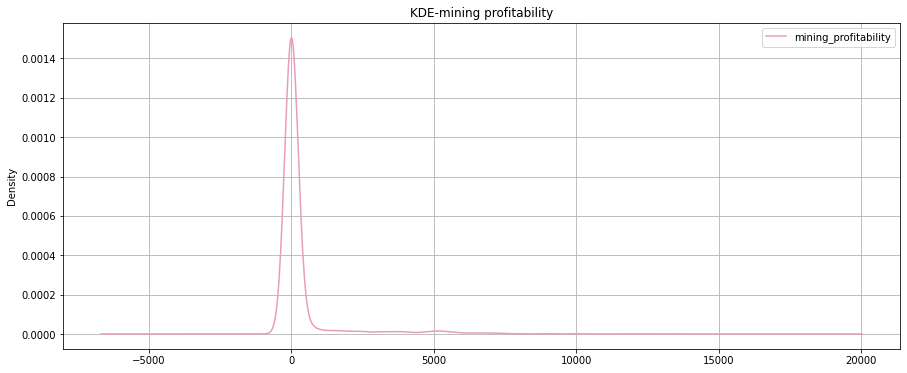

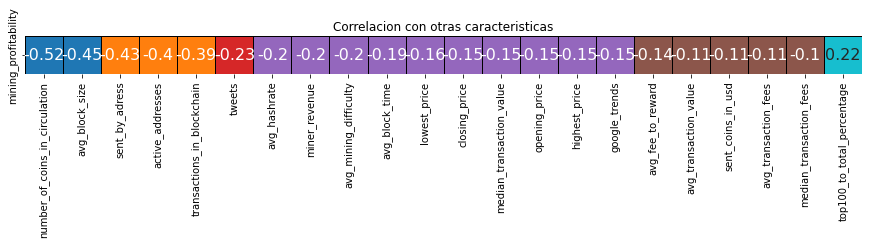

In [13]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='mining_profitability')

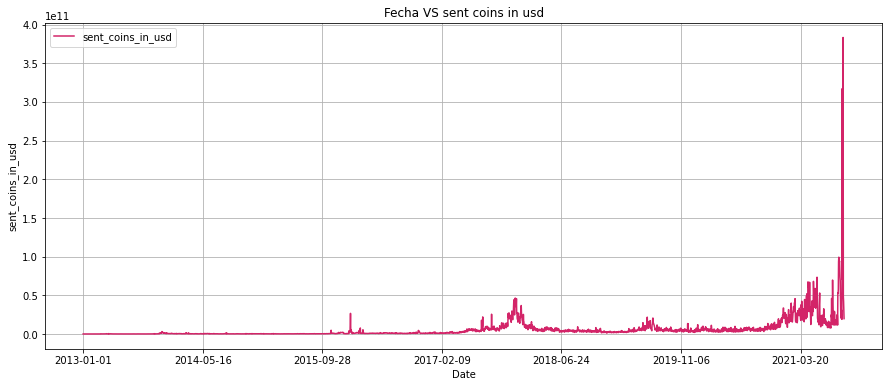

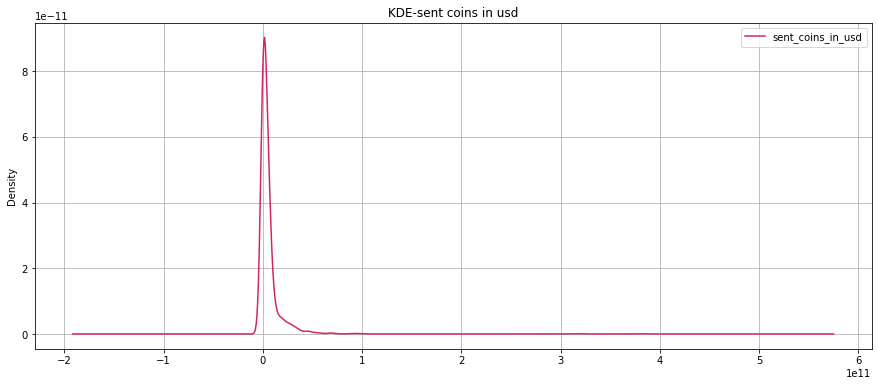

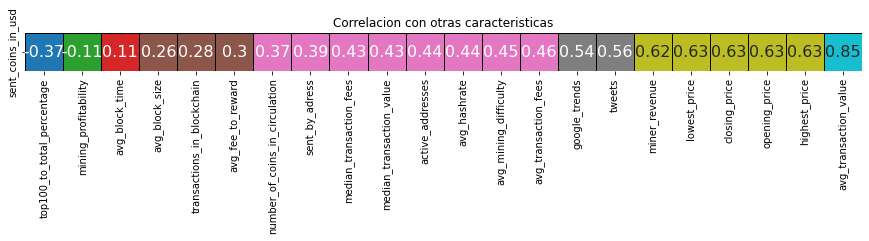

In [14]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='sent_coins_in_usd')

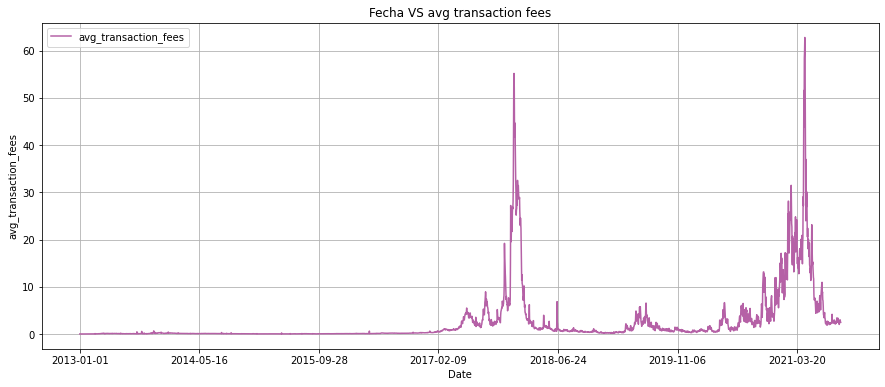

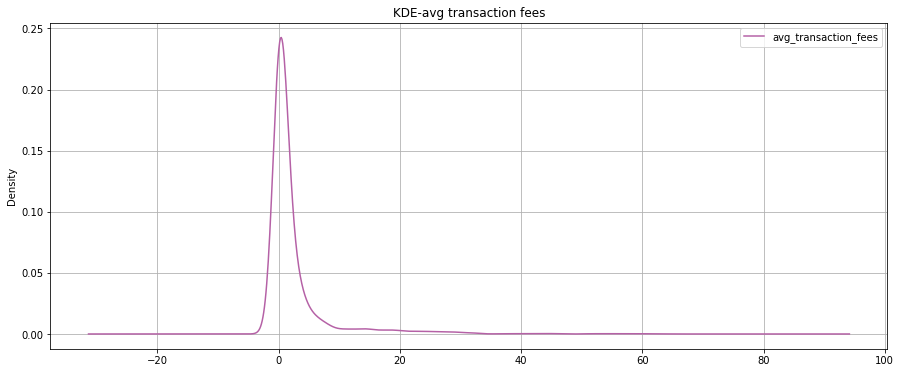

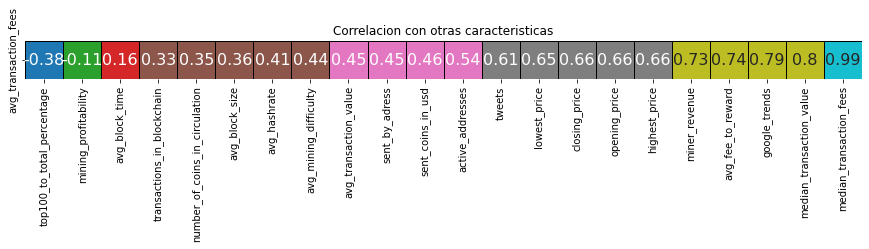

In [15]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='avg_transaction_fees')

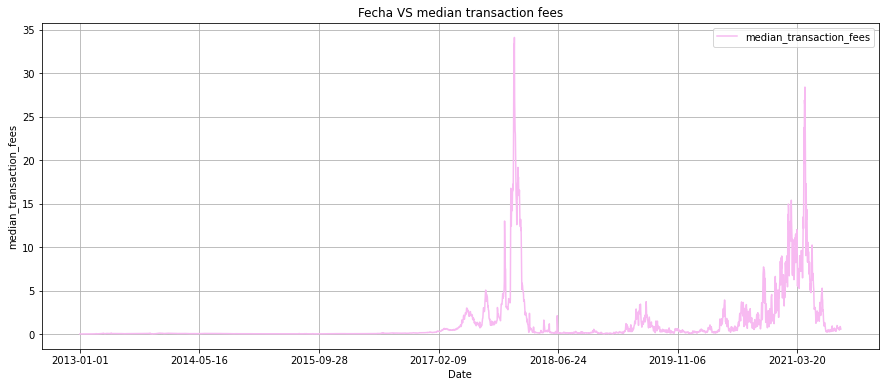

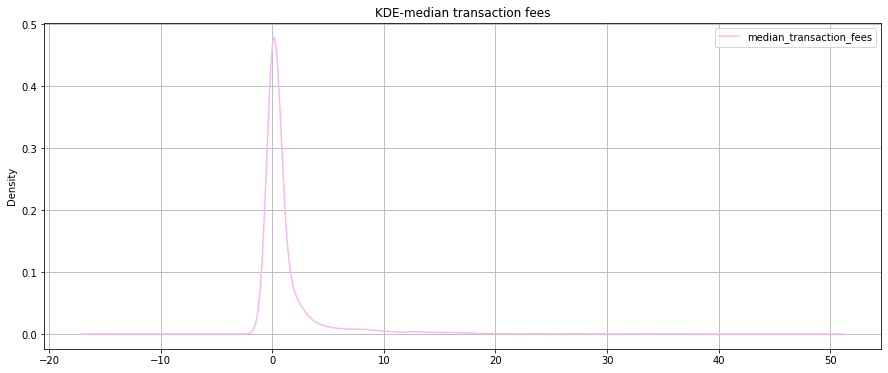

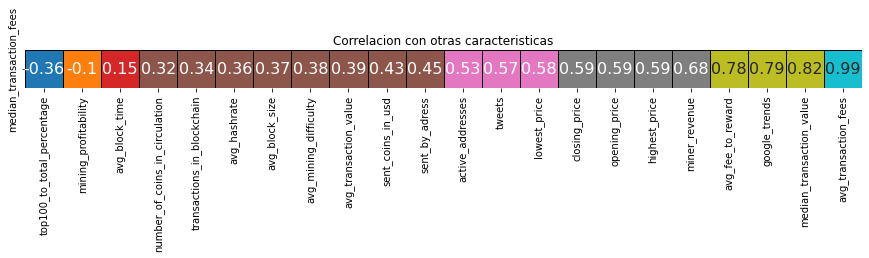

In [16]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='median_transaction_fees')

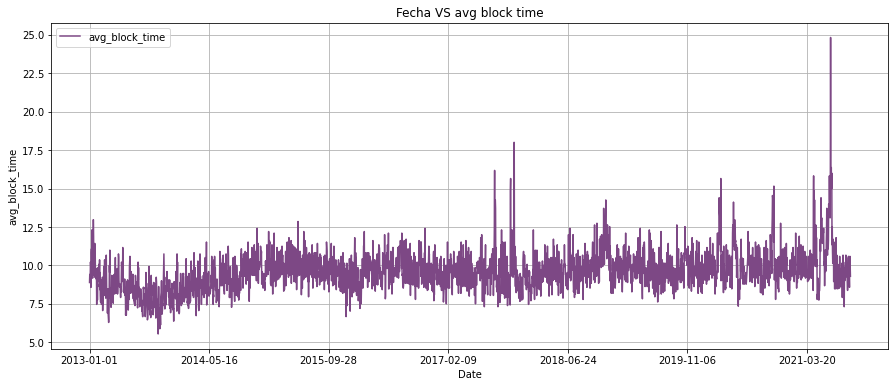

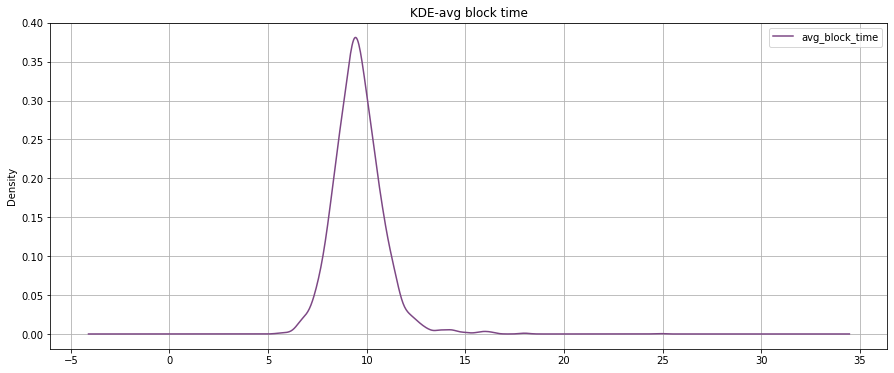

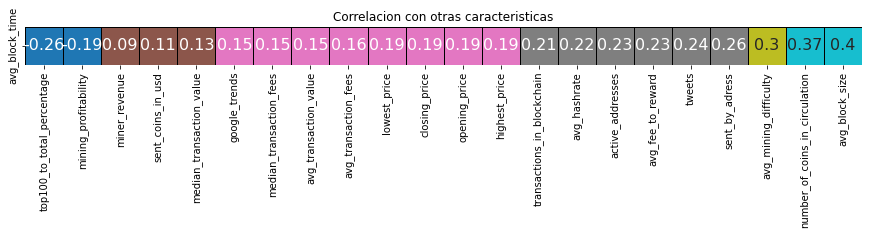

In [17]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='avg_block_time')

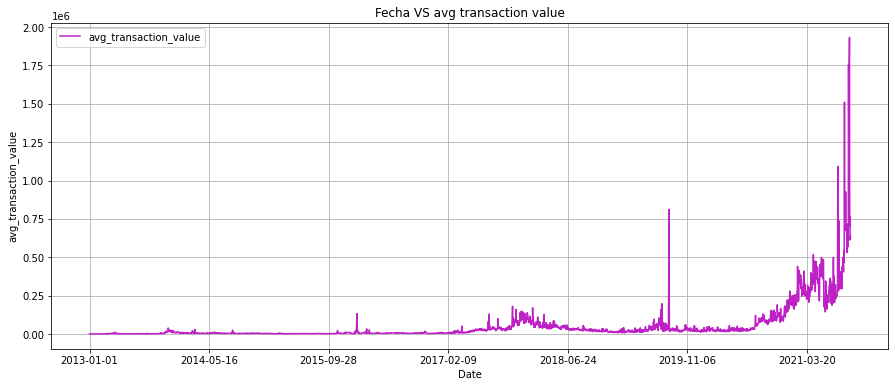

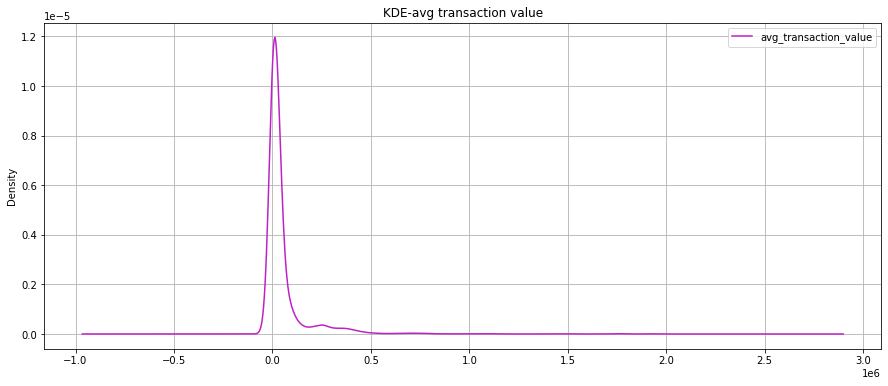

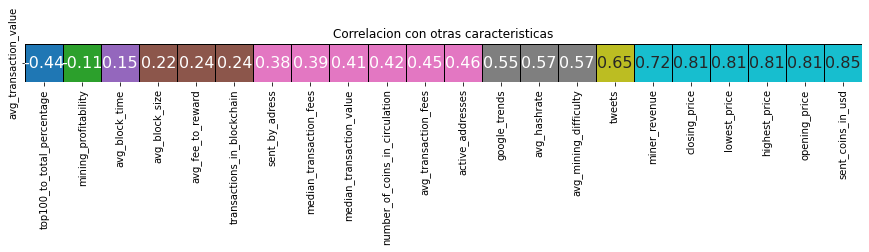

In [18]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='avg_transaction_value')

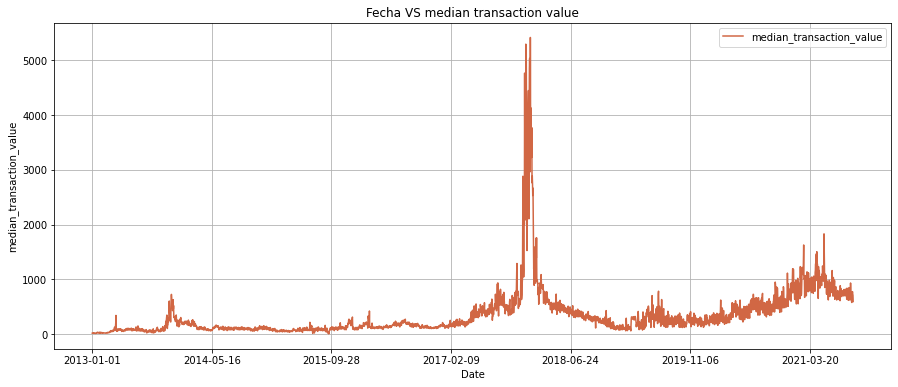

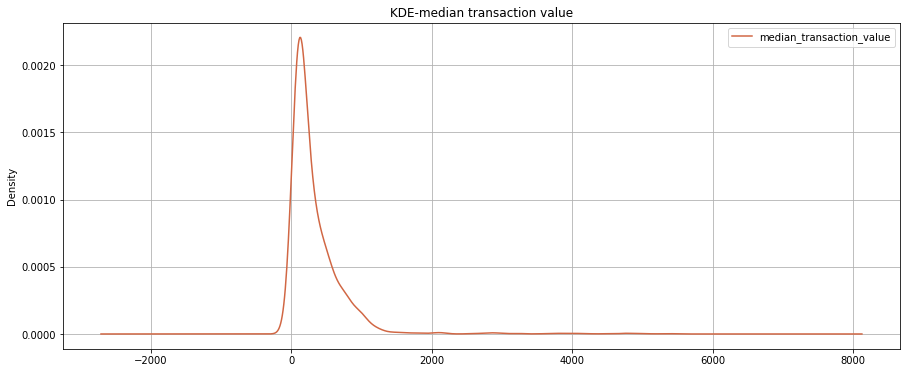

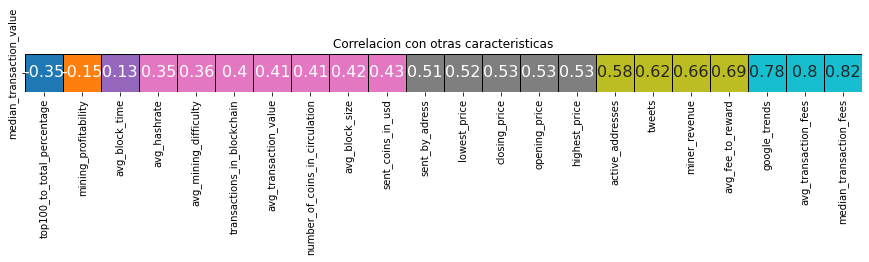

In [19]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='median_transaction_value')

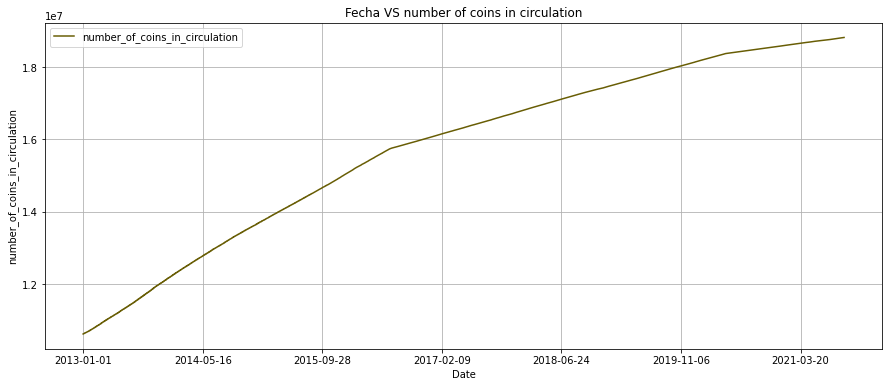

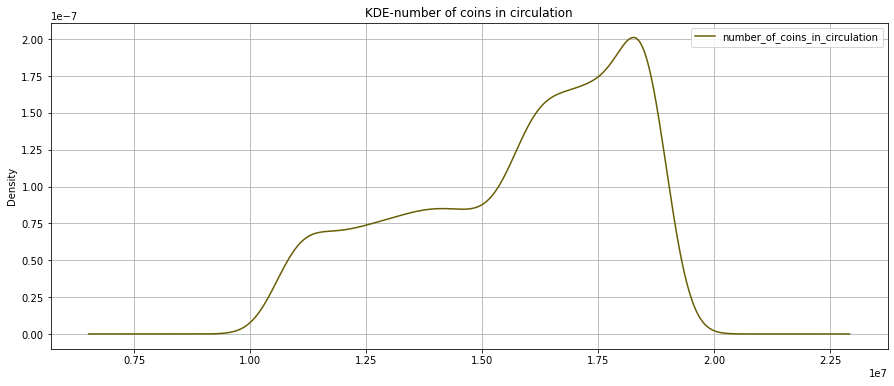

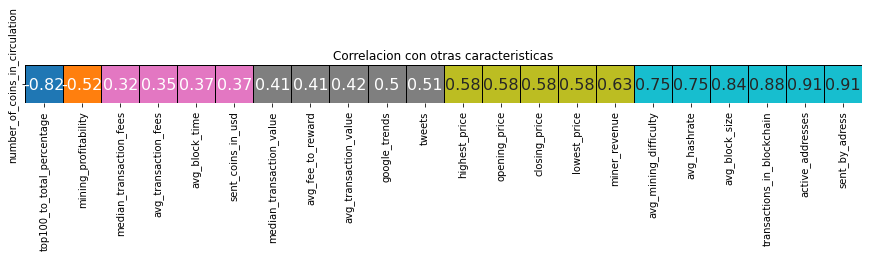

In [20]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='number_of_coins_in_circulation')

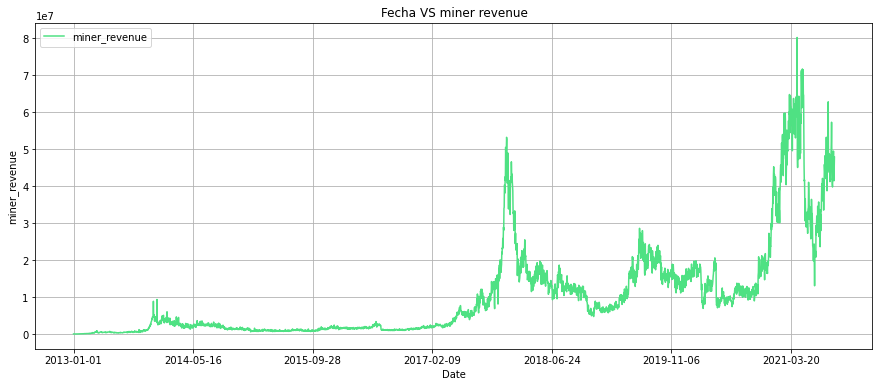

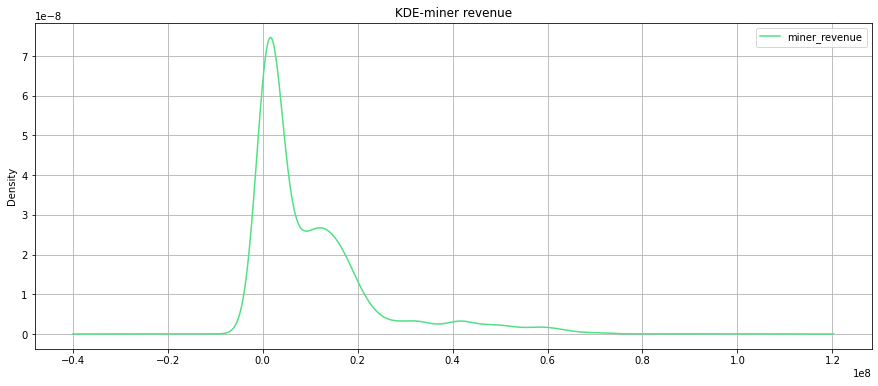

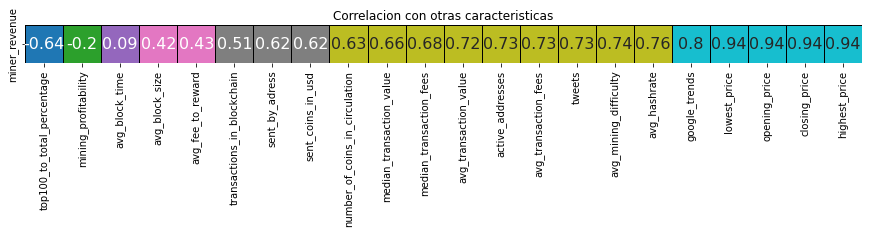

In [21]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='miner_revenue')

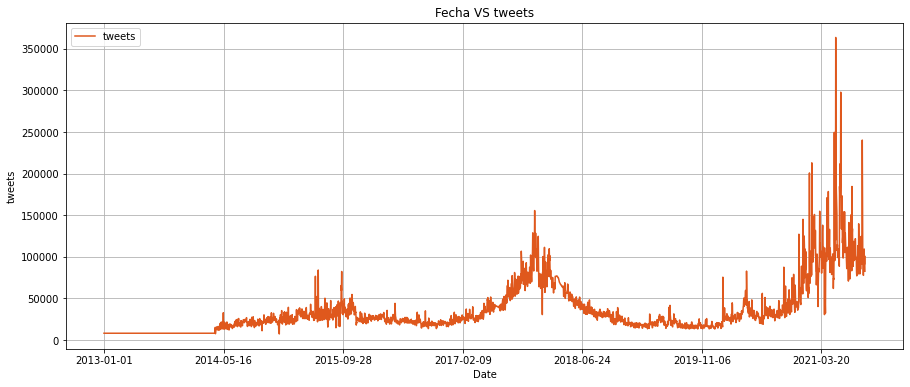

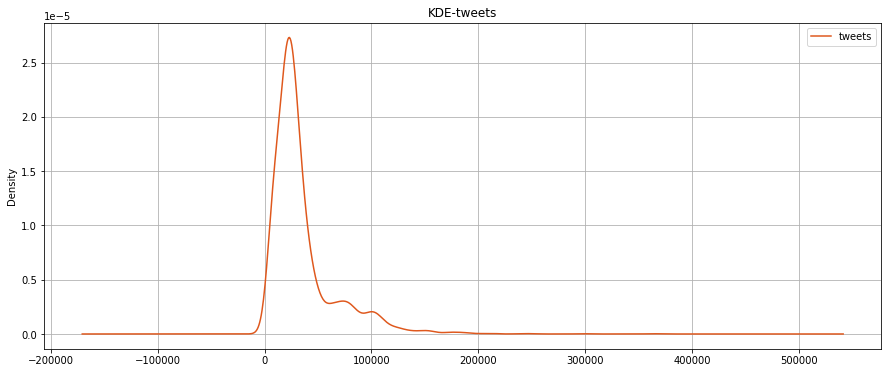

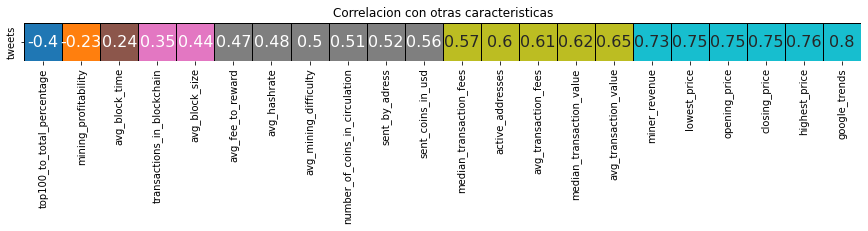

In [22]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='tweets')

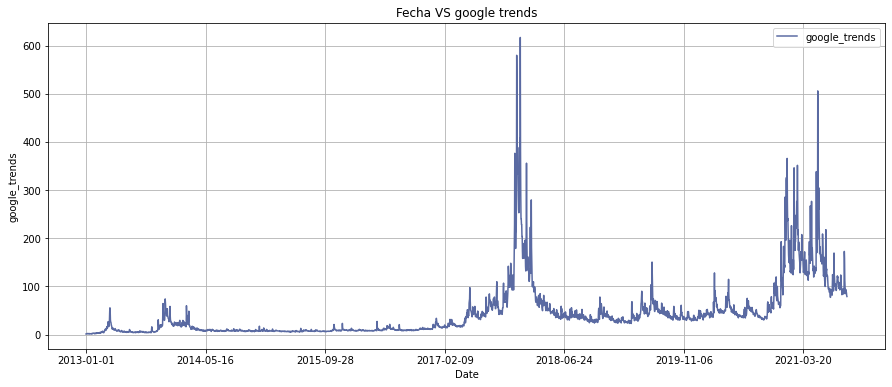

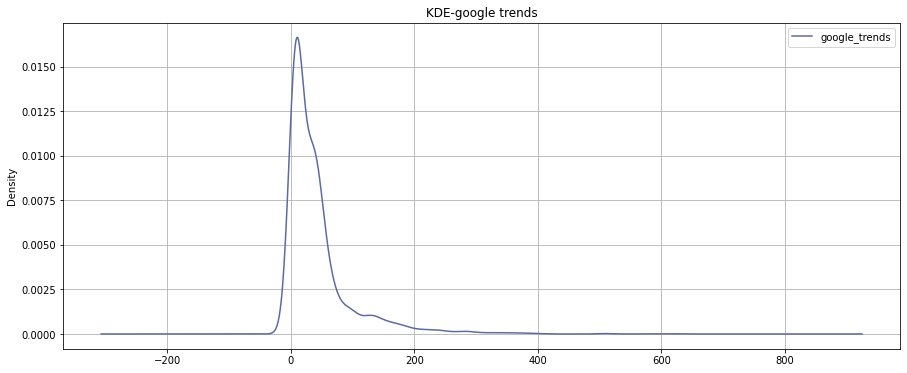

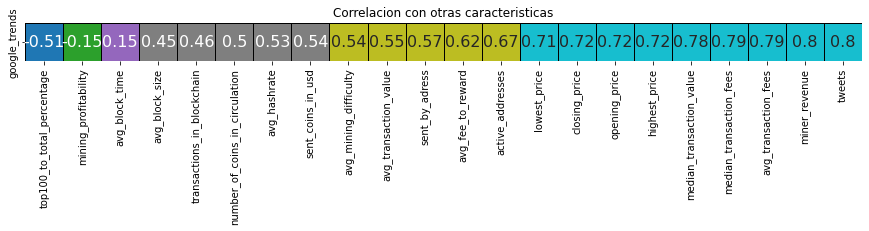

In [23]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='google_trends')

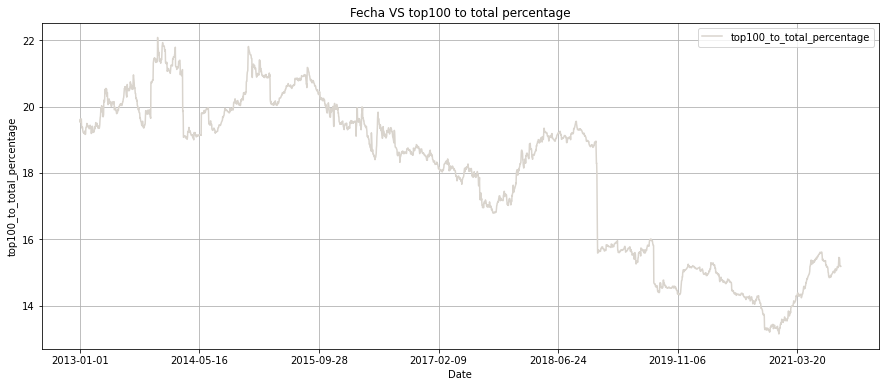

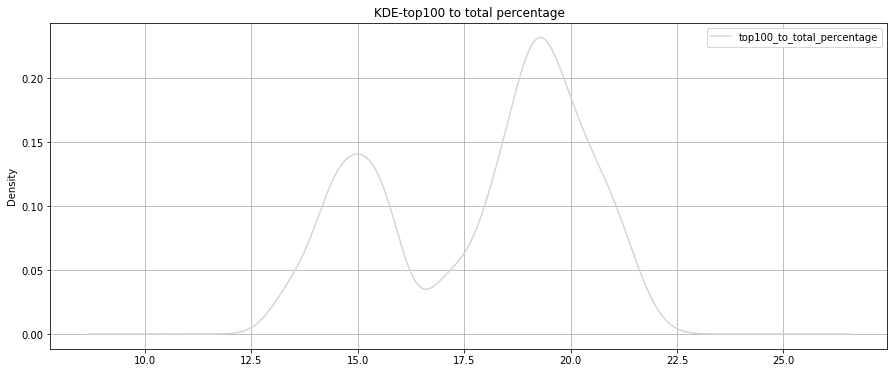

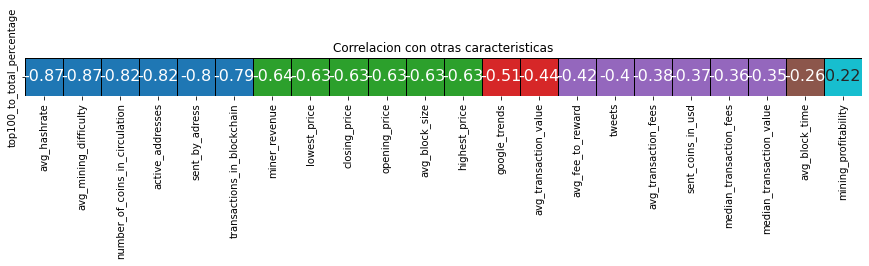

In [24]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='top100_to_total_percentage')

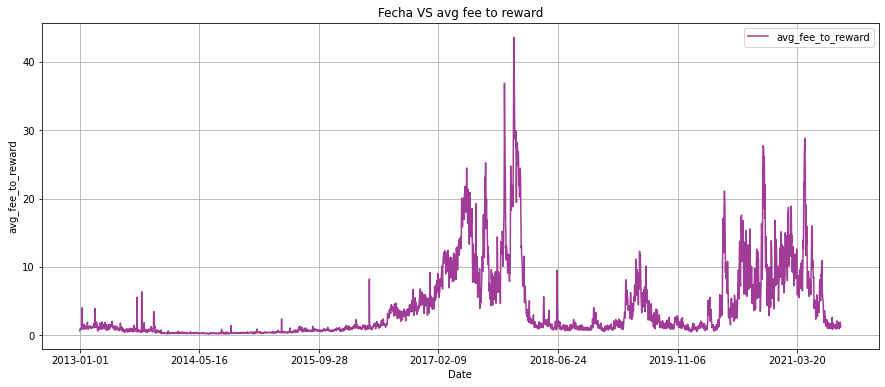

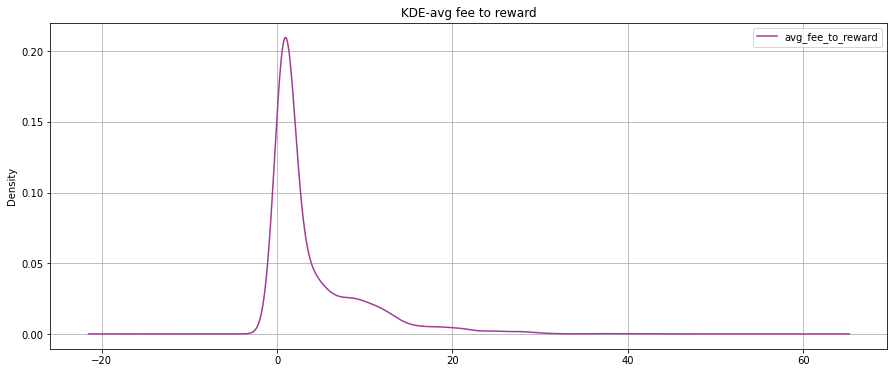

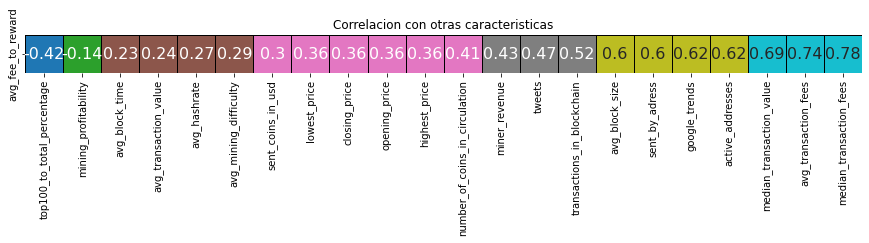

In [25]:
plotear_datos(df_final_precio_cierre_dia_sig,nombre_carac='avg_fee_to_reward')